In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE



In [3]:

# Function to load data
def load_data(file_path):
    try:
        if file_path.endswith(".csv"):
            data = pd.read_csv(file_path)
        elif file_path.endswith(".xlsx"):
            data = pd.read_excel(file_path)
        else:
            raise ValueError("Unsupported file format. Please provide a CSV or XLSX file.")
        
        return data
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None



In [4]:
# Function to remove duplicate rows
def remove_duplicates(data):
    print("Duplicates rows are already removed.")
    data.drop_duplicates(inplace=True)

# Function to remove specified columns
def remove_columns(data, columns_to_remove):
    if columns_to_remove:
        data.drop(columns=columns_to_remove, inplace=True)



In [5]:
# Function for label or one-hot encoding
def encode_columns(data, columns_to_encode, encode_option):
    if columns_to_encode:
        if encode_option == "label":
            for column in columns_to_encode:
                data[column] = data[column].astype("category").cat.codes
        elif encode_option == "one-hot":
            data = pd.get_dummies(data, columns=columns_to_encode)
    return data

# Function to display NaN value counts and optionally remove rows with NaN values
def handle_nan_values(data):
    nan_counts = data.isnull().sum()
    print("NaN Value Counts for Each Column:")
    print(nan_counts)
    
    rows = input("Do you want to remove rows with NaN values? (yes/no): ").lower()
    
    if rows == "yes":
        data.dropna(axis=0, how='any', inplace=True)
        print("Rows with NaN values removed.")
    else:
        print("No rows with NaN values were removed.")



In [6]:
# Function for dimensionality reduction using PCA or t-SNE
def reduce_dimensionality(data, reduction_option):
    if reduction_option == "pca":
        numerical_columns = data.select_dtypes(include=[np.number])
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(numerical_columns)
        pca = PCA(n_components=2)
        pca_result = pca.fit_transform(scaled_data)
        data['PCA1'] = pca_result[:, 0]
        data['PCA2'] = pca_result[:, 1]
    elif reduction_option == "tsne":
        numerical_columns = data.select_dtypes(include=[np.number])
        tsne = TSNE(n_components=2, init='pca', learning_rate='auto')
        tsne_result = tsne.fit_transform(numerical_columns)
        data['t-SNE1'] = tsne_result[:, 0]
        data['t-SNE2'] = tsne_result[:, 1]

# Function to perform K-means clustering
def perform_kmeans(data, reduction_option, num_clusters):
    if reduction_option == "none":
        numerical_columns = data.select_dtypes(include=[np.number])
        kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
        clusters = kmeans.fit_predict(numerical_columns.values)
    else:
        reduced_data = data[['PCA1', 'PCA2']] if reduction_option == "pca" else data[['t-SNE1', 't-SNE2']]
        kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
        clusters = kmeans.fit_predict(reduced_data.values)
    
    data['Cluster'] = clusters
    return kmeans



In [7]:
# Function to visualize clusters and cluster centers
def visualize_clusters(data, reduction_option, kmeans):
    if reduction_option == "pca":
        reduced_data = data[['PCA1', 'PCA2']]
    elif reduction_option == "tsne":
        reduced_data = data[['t-SNE1', 't-SNE2']]
    else:
        reduced_data = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
    
    plt.figure(figsize=(10, 6))
    plt.scatter(reduced_data.iloc[:, 0], reduced_data.iloc[:, 1], c=data['Cluster'], cmap='viridis', label='Data Points')

    # Plot cluster centers
    cluster_centers = kmeans.cluster_centers_
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=100, c='red', label='Cluster Centers', marker='X')

    if reduction_option == "pca":
        plt.title(f'Clustered Data with Cluster Centers (PCA)')
    elif reduction_option == "tsne":
        plt.title(f'Clustered Data with Cluster Centers (t-SNE)')
    else:
        plt.title(f'Clustered Data with Cluster Centers (No Dimension Reduction)')
    
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend()
    plt.show()



Enter the file path of your data: D:\Datascience\Electropi\ElectroAI_Python_Notebook-main\USPVL\data\Mall_Customers.csv
Duplicates rows are already removed.
Columns available for removal:
Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')
Enter column name to remove (or leave empty to finish): CustomerID
Enter column name to remove (or leave empty to finish): 
Columns available for encoding:
Index(['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')
Enter column name to encode (or leave empty to finish): Genre
Enter column name to encode (or leave empty to finish): 
Do you want to perform label encoding or one-hot encoding? (label/one-hot/none): label
NaN Value Counts for Each Column:
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
Do you want to remove rows with NaN values? (yes/no): no
No rows with NaN values were re

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


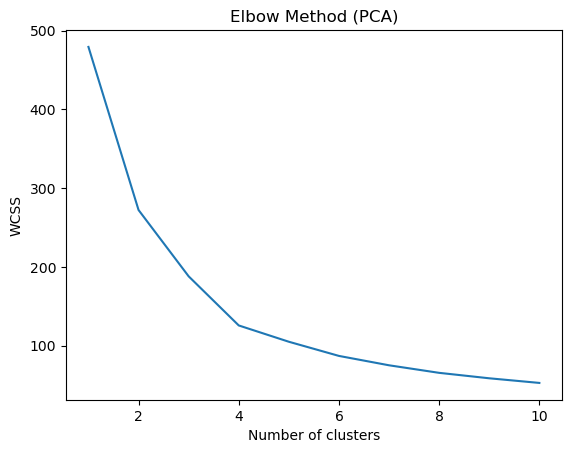

Enter the number of clusters (K) based on the elbow method (PCA): 5
K-means clustering completed. Cluster labels added to the data.
   Genre  Age  Annual Income (k$)  Spending Score (1-100)      PCA1      PCA2  \
0      1   19                  15                      39 -0.406383 -0.520714   
1      1   21                  15                      81 -1.427673 -0.367310   
2      0   20                  16                       6  0.050761 -1.894068   
3      0   23                  16                      77 -1.694513 -1.631908   
4      0   31                  17                      40 -0.313108 -1.810483   

   Cluster  
0        1  
1        2  
2        1  
3        2  
4        1  


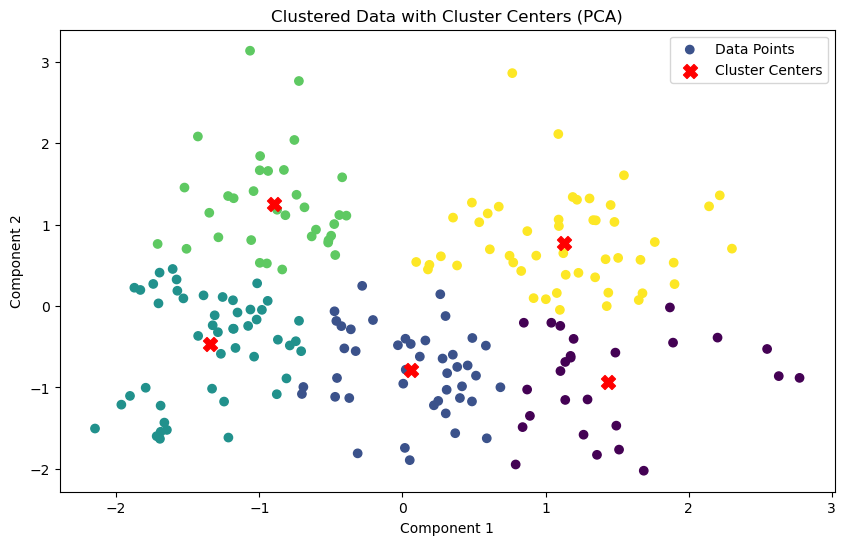

In [8]:
# Main function
def main():
    # Load the data
    file_path = input("Enter the file path of your data: ")
    loaded_data = load_data(file_path)

    if loaded_data is not None:
        remove_duplicates(loaded_data)

        print("Columns available for removal:")
        print(loaded_data.columns)
        columns_to_remove = []
        while True:
            column_name = input("Enter column name to remove (or leave empty to finish): ")
            if not column_name:
                break
            if column_name in loaded_data.columns:
                columns_to_remove.append(column_name)
            else:
                print(f"Column '{column_name}' not found. Please enter a valid column name.")
        remove_columns(loaded_data, columns_to_remove)

        print("Columns available for encoding:")
        print(loaded_data.columns)
        columns_to_encode = []
        while True:
            column_name = input("Enter column name to encode (or leave empty to finish): ")
            if not column_name:
                break
            if column_name in loaded_data.columns:
                columns_to_encode.append(column_name)
            else:
                print(f"Column '{column_name}' not found. Please enter a valid column name.")
        encode_option = input("Do you want to perform label encoding or one-hot encoding? (label/one-hot/none): ").lower()
        loaded_data = encode_columns(loaded_data, columns_to_encode, encode_option)

        handle_nan_values(loaded_data)

        reduction_option = input("Choose dimensionality reduction method (PCA/tsne/none): ").lower()
        reduce_dimensionality(loaded_data, reduction_option)

        if reduction_option in ["pca", "tsne"]:
            # Determine the optimal number of clusters using the elbow method
            reduced_data = loaded_data[['PCA1', 'PCA2']] if reduction_option == "pca" else loaded_data[['t-SNE1', 't-SNE2']]
            wcss = []

            for i in range(1, 11):
                kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
                kmeans.fit(reduced_data.values)
                wcss.append(kmeans.inertia_)

            # Plot the elbow curve
            plt.plot(range(1, 11), wcss)
            plt.title(f'Elbow Method ({reduction_option.upper()})')
            plt.xlabel('Number of clusters')
            plt.ylabel('WCSS')
            plt.show()

            num_clusters = int(input(f"Enter the number of clusters (K) based on the elbow method ({reduction_option.upper()}): "))
        else:
            num_clusters = int(input("Enter the number of clusters (K): "))

        kmeans = perform_kmeans(loaded_data, reduction_option, num_clusters)

        print("K-means clustering completed. Cluster labels added to the data.")
        print(loaded_data.head())

        visualize_clusters(loaded_data, reduction_option, kmeans)

if __name__ == "__main__":
    main()